In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#! Please read the ML Notes document for more info 
#* This is our dataset that we got from kaggle
df = pd.read_csv("Customer-Churn-Records.csv")

In [2]:
# First let us get an overview of the data
print(df.shape)
df.head()

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
#* Checking for missing data
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

<font color='0FF00'> No missing values, so there will be no need for imputation. However, there will most likely still be outliers and an opportunity for feature engineering  </font>

In [3]:
#
#! I will remove RowNumber and CustomerId so I can check for duplicates
df = df.drop(columns=['RowNumber','CustomerId'])
df.duplicated().sum()

0

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


<font color='0FF00'> 
RowNumber & CustomerId most likely are all unique values and wil be dropped.

CreditScore seems to be in a normal range (though the mean of 652 is pretty high). So we might be dealing with a high end bank. (I explore credit score more later)

Age seems to be normal range as well. We might have a clue of its country since the minimum age is 18. Or the bank is not interested of churn when it regards >18 (i.e. minors).

Tenure max tells us that the bank has been in business for 10 years. 

Balance. Interesting that there is no negative balance? Maybe this bank does not allow it. 25% or more have no money in their bank account.

NumOfProducts. A bank only offering 4 products seem kind of low. Maybe they are grouping their products into categories? The average bank customer has not bought any products

HasCrCard. Only 70% of customers have a credit!? 

IsActiveMember. About half of the customer are active member. It does not say what the criterion to be active is. Maybe one use per month?

EstimatedSalary. We have no idea how the salary is estimated. It could be from self reports or based on bank activity (average money deposited to an account). 100193.915000 ~ 100_193€. This amount fits with the data being annual reports (year salary). I will get more into later regarding if tis in euros or not. AS would be expected bank customers include some high rollers and some unlucky individuals.

Exited (churn) is 20%, which is a bit high. I will get more into depth about this.

Complain and Exited have very similar values.

Satisfaction Score. A 5 point system (you cannot give a 0). mean score is 3, so about average. 

Point Earned (how much the credit card is used). Weird that no one has 0 points since lots of customers don't have a credit card. This could mean that you can get points without using the credit card. Could be due to lots of reasons. I will go more into detail when i examine this feature.

These are only the numerical features.
</font>

In [7]:
# Here are the categorical features.
df.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


<font color='0FF00'>  

Surname. Surprisingly few unique surnames. Smith being the most common is noteworthy since its the most common name in the US. This is a bit concerning in regards to data validity (i.e. if its real) since the bank is most likely european.

Geography. Only 3 countries! This is also very surprising and hints at the dataset not being a random or full dataset. This probably tells us that the bank is French 

Gender. Only 2 genders. I dont know if contemporary lets you choose between more than those binary choices. 'Other' is very common nowadays. 

Card Type. 4 card 'levels'. DIAMOND being the most common values is also a bit odd since its diamond level is usually the top and most expensive one. 

</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

<font color='0FF00'> 
A good mixture between different data types. 

All object type are categorical features that will have to get transformed.

Though it is not shown here in that way. This dataset contains alot of bool datatypes (but in the 0 or 1 int format)
</font>

<font color=''> 
Now lets us plot each feature as well as take a look at unique values and potential outliers.
First we will look at features by themselves and then move on to compare features and look for interactions.
</font>

In [6]:

# * Lets start with the target feature Exited

# Binary target feature - which means we are dealing with binary classification problem.
# 0 = remained customer. 1 = left bank.
# This means we have an unbalanced dataset that we need to handle.
print(df.Exited.value_counts(normalize=True))
# * More significant info will be reveled when we look at the interactions 

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


<AxesSubplot: >

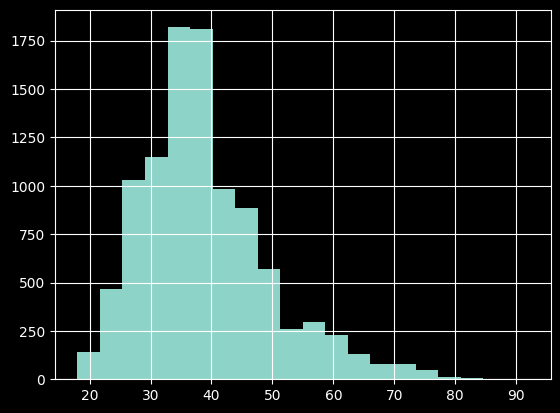

In [12]:
df['Age'].hist(bins=20)
# Looks a normal distribution with a slight positive skewness 
# The distribution is also truncated due the bank having a minimum age limit of 18 
# might need a log transformation
# might be worth discretize this feature since factors such as retirement age could play a significant role
# ! Source: https://www.investopedia.com/how-does-the-new-french-retirement-age-stack-up-globally-7367889
# add bin for when university starts and usually end?

<font color='lightblue'> 
"Banks usually categorize credit scores into several risk profiles or categories. According to CNBC 1, credit scores are typically divided into five categories:

Deep subprime: Credit scores below 580
Subprime: Credit scores between 580 and 619
Near-prime: Credit scores between 620 and 659
Prime: Credit scores between 660 and 719
Super-prime: Credit scores of 720 or above

These categories help banks assess the creditworthiness of borrowers and determine the types of financial products and interest rates they are eligible for."
</font>


Source:
https://www.equifax.com/personal/education/credit/score/credit-score-ranges/

<AxesSubplot: >

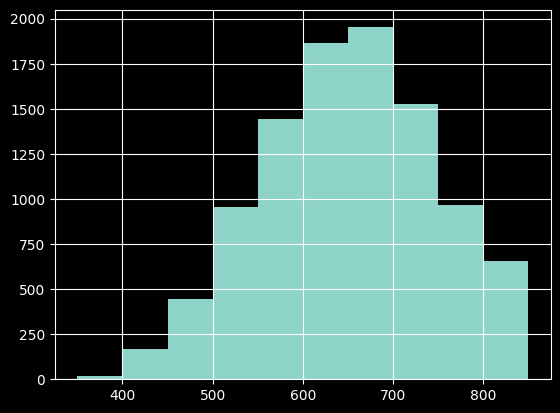

In [15]:
df['CreditScore'].hist()
# Looks like a normal distribution with a cap at the max credit score (truncated)
# should be helpful discretize this feature as well, especially since i can follow the groupings that are mentioned in the article

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


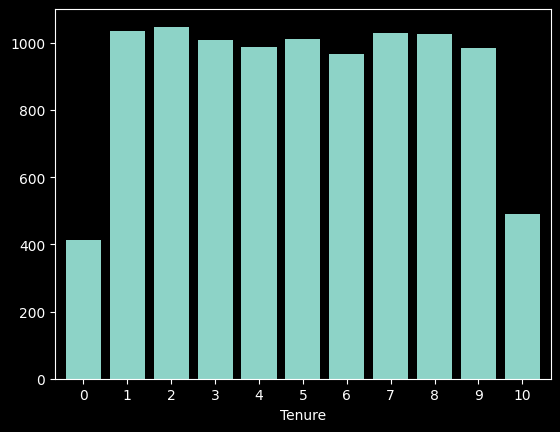

In [36]:
print(df['Tenure'].value_counts())

df['Tenure'].value_counts().sort_index().plot(kind='bar',width=0.8)
plt.xticks(range(len(df['Tenure'].unique())))
plt.xticks(rotation=0)
plt.show()
# * We have a mostly constant distribution besides both ends. Can be interpreted as the bank getting almost the same number of customers each year, but the bank did not start of a year (so the count is cut off) OR that it took about a year for the bank to build up notoriety. Same could be said for the last year (tenure 0) with a potential cut off OR the bank is having difficulties and not signing as much new customers as usual.
# I will probably not scale this feature since its already ordinally structured. 


<AxesSubplot: >

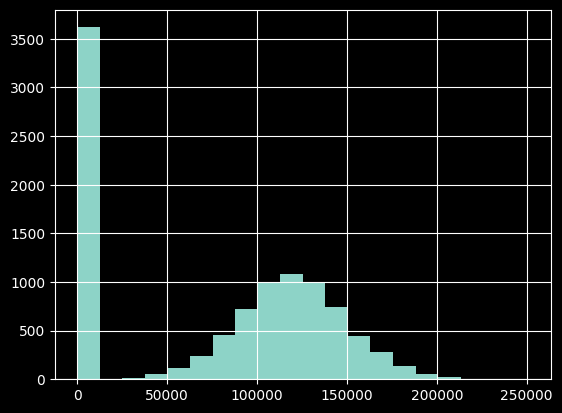

In [35]:
# print(df['Balance'].value_counts())
df['Balance'].hist(bins=20)
# * We have a pretty clear normal distribution besides lots of 0:s (people not having any money in their account)
# * If the values besides the 0:s were skewed, then you could transform just them and not have the transformation skewed by all the 0:s.
# * Could be worth breaking out the 0:s into a sepeare feature i.e. HasBalance     


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


<AxesSubplot: >

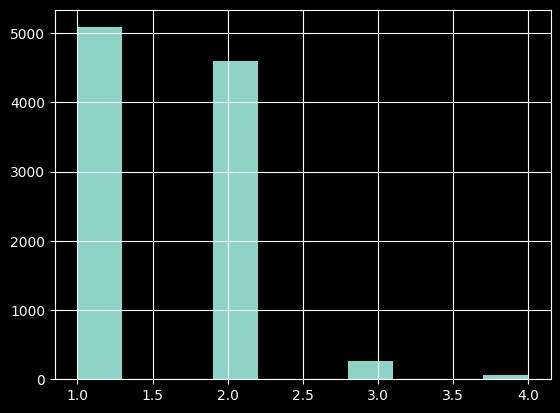

In [48]:
print(df['NumOfProducts'].value_counts())
df['NumOfProducts'].hist()
# * Very few customers have buy/use 3 and 4 products.
# * The bank apparently offers only 2 prodcuts that most customers care about (or can afford)
# * combining category 3 and 4 will help a bit with the unbalance.
# * Clustering or create a PCA component might be a better idea.

<AxesSubplot: >

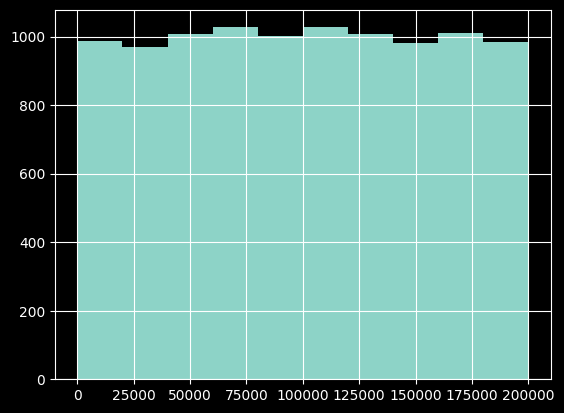

In [71]:
df['EstimatedSalary'].hist(bins=10)
#! A relatively uniform distribution. Features like this tends to be normally distributed in some way so this being uniformly distributed is alarming
#* We already know that the distribution is zero-heavy when it comes to Balance.
#* Again, weird that this feature is not more reflecting of Balance
#* Seems like this feature does not need to be transformed. 
#* Again, discretize might help make things clearer.For example using the cut off of minimum wage or unemployment benefits

In [9]:
#* No bank customers has an 0 estimated salary. Perhaps due to benefits? So no customer has the bank as a secondary bank for savings?
count_zero_balance = len(df[df['EstimatedSalary'] == 0])
print(count_zero_balance)

0


SatisfactionScore
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


<AxesSubplot: >

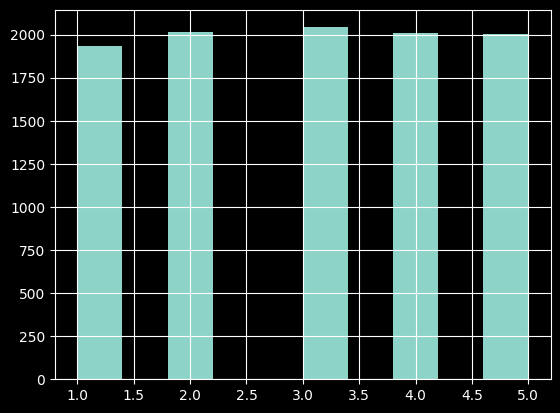

In [73]:
# lets rename this feature so that there is no space in the column name.
df = df.rename(columns={'Satisfaction Score': 'SatisfactionScore'})
print(df['SatisfactionScore'].value_counts())
df['SatisfactionScore'].hist()
# * Again a very uniform distribution
# * This is also pretty weird values since it is very unlikely that all customers would have given a rating (bedsides if it was mandatory)
# ? "Satisfaction Score — Score provided by the customer for their complaint resolution."
# ! the data says that ~20% of customers has complained, so why would then all custoemrs have a Satisfaction Score rating?

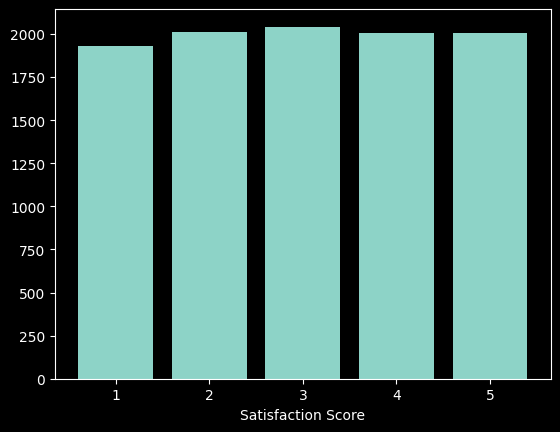

In [82]:
df['SatisfactionScore'].value_counts().sort_index().plot(kind='bar',width=0.8)
plt.xticks(range(len(df['SatisfactionScore'].unique())))
plt.xticks(rotation=0)
plt.xlabel('Satisfaction Score')
plt.show()

<AxesSubplot: >

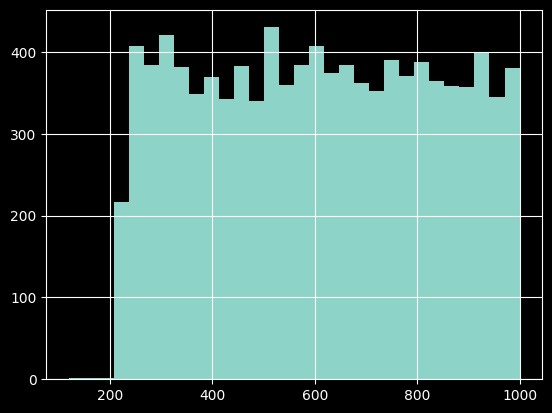

In [86]:
# lets rename this feature so that there is no space in the column name.
df = df.rename(columns={'Point Earned': 'PointsEarned'})
df['PointsEarned'].hist(bins=30)
# * Minimum point is 200 (maybe you get this when sign up with the bank?)
#! Also seems like a feature that should be more normally distributed (with some skewness)
# ? "Points Earned — the points earned by the customer for using credit card."
# * I dont have the domain knowledge to really say, but maximum 1000 points seems like a cutoff
# * Otherwise a pretty unifrom distirbution
# * Again, discretize might help make things clearer.For example using the cut off of minimum wage or unemployment benefits
# * Maybe Points Earned correlates with credit card level? (we will look at this soon)

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64



<AxesSubplot: >

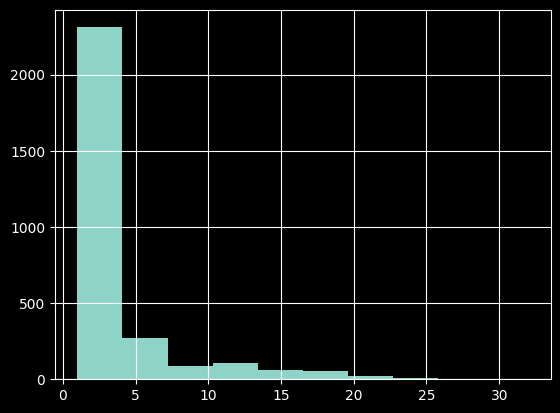

In [89]:
nameCount = df.Surname.value_counts()
nameCount.hist()
# * Quite many names are duplicate. Perhaps there could be some correlation between family names or maybe some discrimination factors for foreign sounding names
#? "Surname—the surname of a customer has no impact on their decision to leave the bank"

Country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'France'), Text(1, 0, 'Germany'), Text(2, 0, 'Spain')])

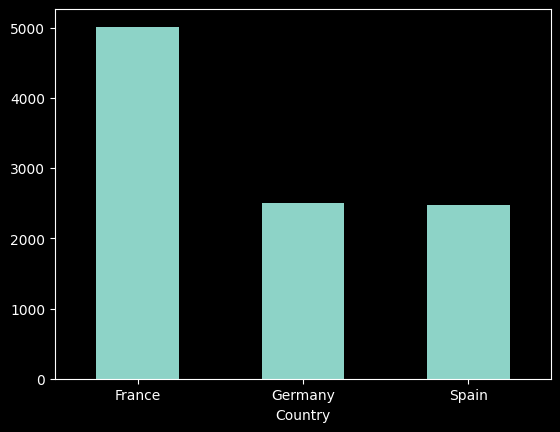

In [100]:
# lets rename this feature feature from Geography to Country
df = df.rename(columns={'Geography': 'Country'})
print(df['Country'].value_counts())

# df.plot.bar(x=df.Geography)
df['Country'].value_counts().plot.bar()
plt.xticks(rotation=0)

#* Again , probably a French bank.
#* I could perhaps use some country information such as GDP to encode this feature.

Gender
Male      5457
Female    4543
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

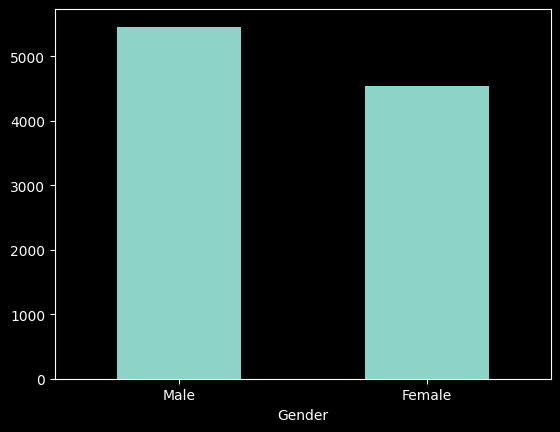

In [103]:
# Gender
print(df['Gender'].value_counts())
# df.plot.bar(x=df.Geography)
df['Gender'].value_counts().plot.bar()
plt.xticks(rotation=0)
# * More male than Female bank customers. 
# * Is this uneven enough to be considered unequal?
# Will explore more when we compare features

CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'DIAMOND'),
  Text(1, 0, 'GOLD'),
  Text(2, 0, 'SILVER'),
  Text(3, 0, 'PLATINUM')])

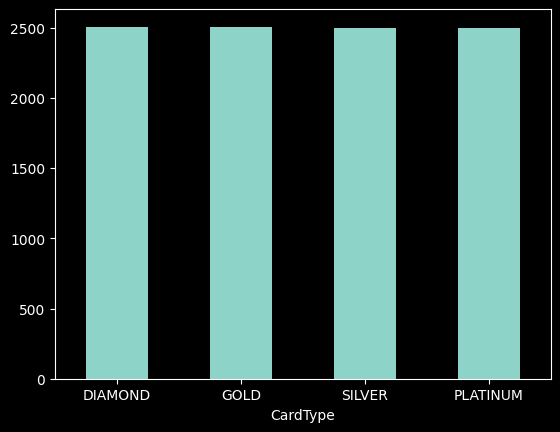

In [104]:
# lets rename this feature so that there is no space in the column name.
df = df.rename(columns={'Card Type': 'CardType'})
print(df['CardType'].value_counts())

df['CardType'].value_counts().plot.bar()
plt.xticks(rotation=0)

#! Again, very strange distribution. The most expensive one (Diamond) usually has significantly less users/buyers
#* If this dataset is authentic, then perhaps the sample was sampled so that it took an equal amount of customers from each card type category?
#* will clearly be ordinal encoded

In [10]:
# * Lets see the value counts for all the binary independent features
print(df.HasCrCard.value_counts())
print(df.IsActiveMember.value_counts())
print(df.Complain.value_counts())
# * Nothing new to see that was not shown in the df.describe
# * HasCrCard has pretty similar value_count as Complain and Exited
#! Only about half the customers are active (but we dont know what the bank means by this)

HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Complain
0    7956
1    2044
Name: count, dtype: int64
